# Module 1 Project

## King County House Sales

### Introduction
<h4> The purpose of this project is to investigate the variables of homes sold in King County, Washington and to develop a model to accurately predict home sale prices. </h4>

### Obtaining the Data
<h4> We will first import all the necessary libaries and modules and then use Pandas to grab the dataset from the kc_house_data.csv and store it as a Pandas Dataframe.


In [1]:
#importing required libraries and setting matplotlib to inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#grabbing the dataset
df = pd.read_csv('kc_house_data.csv')

### Scrubbing the Data
<h4> Now we will clean the data to enable us to create our model without errors. First we will drop the 'id', 'date', 'lat', 'long', and 'zipcode' columns as they will not be needed. We will then inspect the dataframe and address the columns will null or missing values.

In [3]:
#dropping id and date columns
df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

In [8]:
#viewing the first 15 rows
df.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [7]:
#checking value in sqft_basement
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
4130.0        1
176.0         1
2610.0        1
516.0         1
2120.0        1
3000.0        1
3480.0        1
1548.0        1
2500.0        1
792.0         1
518.0         1
784.0         1
2580.0        1
666.0         1
1525.0        1
417.0         1
2730.0        1
2130.0        1
2850.0        1
2360.0        1
1024.0        1
1481.0        1
862.0         1
2720.0        1
1990.0        1
248.0         1
1816.0        1
861.0         1
946.0         1
2050.0        1
Name: sqft_basement, Len

<h4>There appears to be some values of '?' in sqft_basement. We will replace these with the column mean.</h4>

In [9]:
#replacing missing data in sqft_basement with column mean
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [10]:
#checking for null values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<h4>The 'view', 'waterfront', and 'yr_renovated' columns all have null values. We will assume that those homes had no views, are not waterfront, and/or were not renovated and fill those null values with 0.

In [ ]:
#replacing null values in waterfront with 0
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

<h4> Now before we modify any of the columns we will create a copy of the dataframe to give us an unaltered version to run models on later for comparison. 

In [11]:
df_original = df

### Exploring the Data
<h4> For this section, we will begin by inspecting the histogram of each variable to look at the distributions and skew.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BB3DD85F8>,
      dtype=object)

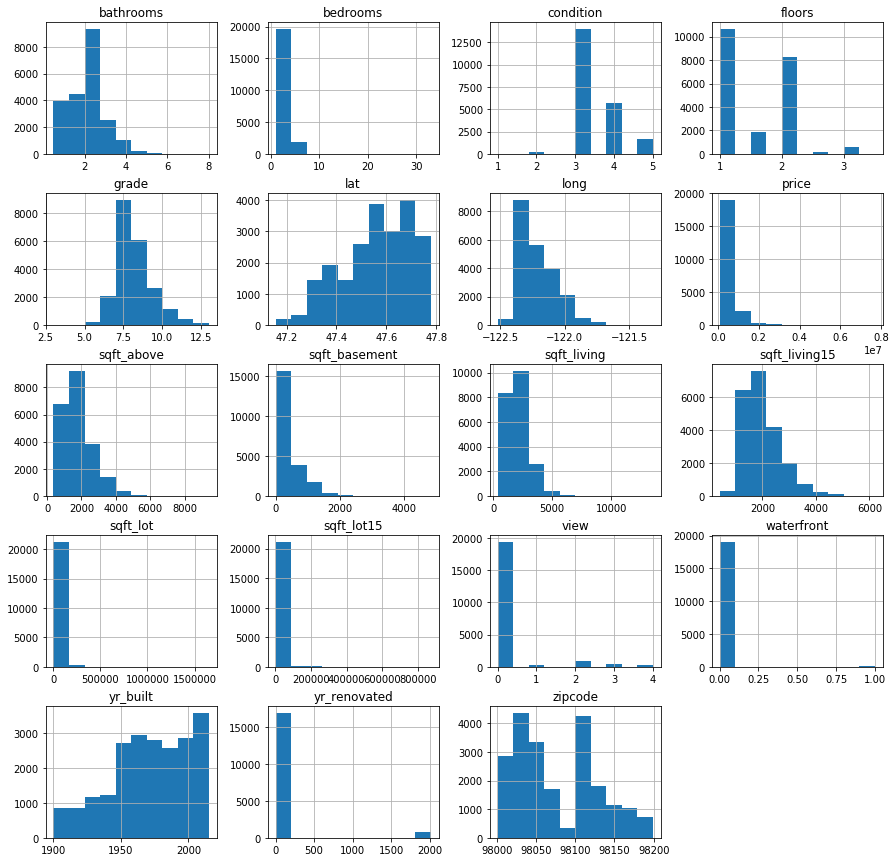

In [14]:
#intial histogram of all variables
df.hist(figsize=(15,15))

<h4> An initial observation of the histograms reveals that nearly none of the variables exhibit a normal distribution and there are outliers in many of the variables. To address these issues, we will iterate through each variable and perform adjustments and transformations in order to give us a more normal distribution.

In [15]:
#checking bedrooms for outliers
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

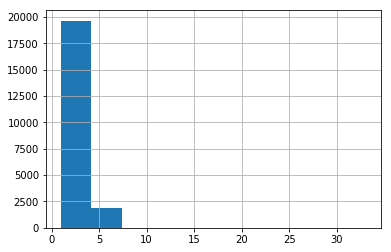

In [16]:
#histogram before removal of outliers
df.bedrooms.hist()

In [17]:
#removing outliers
df.drop(df.index[df['bedrooms'] >= 8], inplace=True)

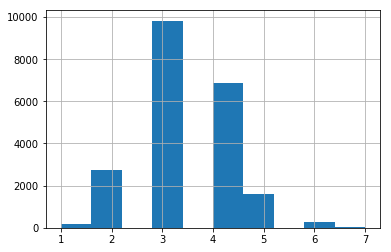

In [18]:
#histogram after removal of outliers
df.bedrooms.hist()

<h6> The 'bedrooms' column had some outliers so all homes with more than 7 bedrooms were removed from the dataframe. The number of homes removed was 24 which represents an insignificant percentage of our total data so removing them should not significantly impact the final model. 

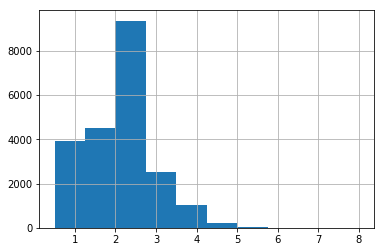

In [19]:
#bathrooms histogram
df.bathrooms.hist()

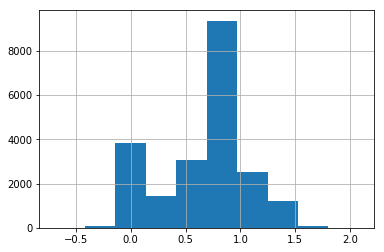

In [20]:
#using log transformation on bathrooms
(np.log(df.bathrooms)).hist()

In [21]:
#transforming bathrooms
df.bathrooms = np.log(df.bathrooms)

<h6> The 'bathrooms' column showed a negatively skewed distribution so we transformed it using a log transformation as the data now exhibits a more normal distribution.

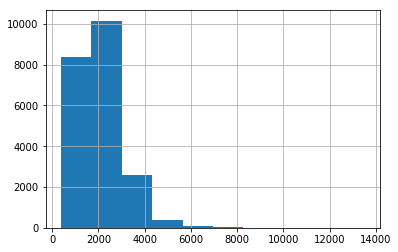

In [22]:
#sqft_living histogram
df.sqft_living.hist()

In [23]:
#checking count of outliers
print(len(df[df.sqft_living > 8000]))
print(len(df[df.sqft_living > 6000]))
print(len(df[df.sqft_living > 4000]))

9
67
773


In [24]:
#removing outliers
df.drop(df.index[df['sqft_living'] > 4000], inplace=True)

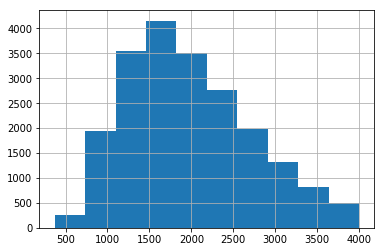

In [25]:
#histogram after removal of outliers
df.sqft_living.hist()

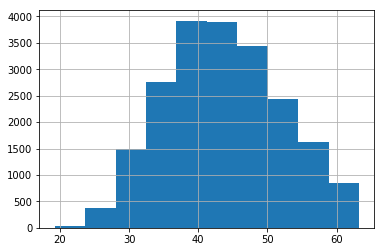

In [26]:
#histogram of square root transformed sqft_living
(np.sqrt(df.sqft_living)).hist()

In [27]:
#square root transformation on sqft_living
df.sqft_living = np.sqrt(df.sqft_living)

<h6> The 'sqft_living' column had some significant outliers. Homes with more than 4000 square feet were removed which was a little over 800 entries. The histogram of the modified data still showed some negative skew so we then performed a square root transformation thus giving us a more normal distribution. 

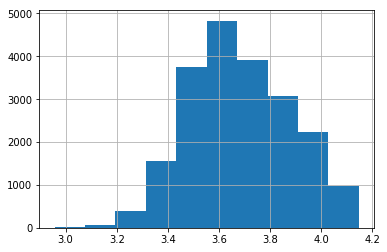

In [33]:
#sqft_above histogram
df.sqft_above.hist()

In [31]:
#square root transformation
df.sqft_above = np.sqrt(df.sqft_above)

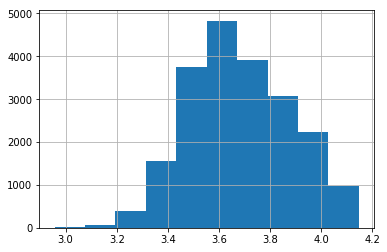

In [32]:
#square root transformed histogram
df.sqft_above.hist()

<h6>

In [ ]:
#sqft_basement histogram
df.sqft_basement.hist()

In [ ]:
#creating new column that declares whether or not a home has a basement
df['basement'] = df.apply(lambda row: 0 if row.sqft_basement == 0 else 1, axis=1)

In [ ]:
#new binary basement histogram
df.basement.hist()

In [ ]:
#price histogram
df.price.hist()

In [ ]:
#log transformation on price
df.price = np.log(df.price)
df.price.hist()

#have seperate log(price) column

In [ ]:
#viewing stats of yr_built
df.yr_built.describe()

In [ ]:
#creating new column age that declares the age of the home
df['age'] = (df.yr_built.max() - df.yr_built + 1)

In [ ]:
#histogram of new age column
df.age.hist()

In [ ]:
#square root transformation on age
df.age = np.sqrt(df.age)
df.age.hist()

In [ ]:
#removal of old yr_built column
df.drop('yr_built',axis=1,inplace=True)

In [ ]:
#sqft_lot histogram
df.sqft_lot.hist()

In [ ]:
#checking number of outliers
len(df[df.sqft_lot>200000])

In [ ]:
#removal of outliers
df.drop(df.index[df['sqft_lot'] > 200000], inplace=True)

In [ ]:
#histogram after removal of outliers
df.sqft_lot.hist()

In [ ]:
#log transformation of sqft_lot
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_lot.hist()

In [ ]:
#histogram of sqft_lot15
df.sqft_lot15.hist()

In [ ]:
#log transformed sqft_lot15
df.sqft_lot15 = np.log(df.sqft_lot15)
df.sqft_lot15.hist()

In [ ]:
#view histogram
df.view.hist()

In [ ]:
#unique values of view
df.view.unique()

In [ ]:
#converting all view values above 0 to 1 to signify that the home has been viewed
df['viewed'] = df.view
i = 4
while i > 0:
    df.viewed = df.viewed.replace(i, 1)
    i -= 1
df.viewed.hist()

In [ ]:
#updated histogram of all variables after transformations and adjustments
df.hist(figsize=(14,14))

In [12]:
#initial linear regression with all variables
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
linreg = LinearRegression()
linreg.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#checking MSE of initial regression
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
#stepwise selection function
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
#checking r-squared and adjusted r-squared for predictors chosen by RFE
i = 1
while i <= (int(len(df.drop('price', axis=1).columns))):
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = i)
    selector = selector.fit(X_train, y_train) 
    selected_columns = X.columns[selector.support_ ]

    model = sm.OLS(y_train,X_train[selected_columns])
    results = model.fit()
    results.summary()
    print(str(i) + " predictors -")
    print("R-squared = " + str(results.rsquared))
    print("Adjusted R-squared = " + str(results.rsquared_adj))
    print(str((X_train.columns[selector.support_])))
    print("--------------------------------------------")
    i += 1

In [ ]:
#RFE regression of all predictors
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=47)
i = 1
while i <= (int(len(df.drop('price', axis=1).columns))):
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = i)
    selector = selector.fit(X_train, y_train) 
    selected_columns = X.columns[selector.support_ ]

    model = sm.OLS(y_train,X_train[selected_columns])
    results = model.fit()
    results.summary()
    print(str(i) + " predictors - " + str(results.rsquared))
    print("------- " + str(X_train.columns[selector.support_]))
    i += 1

In [ ]:
#linear regression using all 17 predictors
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 17)
selector = selector.fit(X_train, y_train) 
selected_columns = X.columns[selector.support_]
linreg.fit(X_train[selected_columns],y_train)

In [ ]:
#coefficients of regression model
i=0
while i < len(selected_columns):
    print(str(selected_columns[i]) + " " + str(linreg.coef_[i]))
    i += 1

In [ ]:
#back-transformed coefficients 
i=0
while i < len(selected_columns):
    print(str(selected_columns[i]) + " " + str(10**(linreg.coef_[i])))
    i += 1

In [ ]:
#calculating mean squared error of train and test data
from sklearn.metrics import mean_squared_error
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
#plotting the divergence of mean squared error as train/test ratio increases
X = df.drop('price', axis=1)
y = df.price
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [ ]:
#choosing a slightly different train/test split size
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
selector = RFE(linreg, n_features_to_select = 17)
selector = selector.fit(X_train, y_train) 
selected_columns = X_train.columns[selector.support_ ]
linreg.fit(X_train[selected_columns],y_train)
print(linreg.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

In [ ]:
#least squares regression with OLS
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

In [ ]:
#calculating mean squared error again
from sklearn.metrics import mean_squared_error

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

In [ ]:
#using cross validation to check average mean squared error
cv_mse = cross_val_score(linreg, X_test, y_test, cv=100, scoring="neg_mean_squared_error")
print("Average Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (cv_mse.mean(), cv_mse.std() * 2))

In [ ]:
#using cross validation to check average R-squared value
cv_rsquared = cross_val_score(linreg, X_test, y_test, cv=100)
print("Average R-squared Value: %0.2f (+/- %0.2f)" % (cv_rsquared.mean(), cv_rsquared.std() * 2))

In [ ]:
#heatmap to check for correlations between variables
sns.heatmap(df.corr(), center=0);
plt.rcParams['figure.figsize']=(12,12)

In [ ]:
#creating dataframe that will remove some of the variables with high correlation to other variables
df_adj = df
to_drop = ['view', 'sqft_lot15', 'sqft_above', 'sqft_basement']
df_adj.drop(to_drop, axis=1, inplace=True)

In [ ]:
#regression of new dataset
linreg = LinearRegression()
X = df_adj.drop('price', axis=1)
y = df_adj.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
selector = RFE(linreg, n_features_to_select = 14)
selector = selector.fit(X_train, y_train) 
selected_columns = X_train.columns[selector.support_ ]
linreg.fit(X_train[selected_columns],y_train)
print(linreg.score(X_test, y_test))

In [ ]:
#least squares regression with OLS
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

In [ ]:
#heatmap to check for correlations between variables
sns.heatmap(df_adj.corr(), center=0);
plt.rcParams['figure.figsize']=(12,12)